<a href="https://colab.research.google.com/github/Marlucben/Challenge-ONE-Data-Science-Telecom-X-parte-2/blob/main/Challenge_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠️ Preparación de los Datos

In [1]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/Marlucben/Challenge-ONE-Data-Science-Telecom-X-parte-2/refs/heads/main/df_nuevo.json'
df_nuevo = pd.read_json(url , orient="records", lines=True)
df_nuevo.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Days
0,0002-ORFBO,NO,FEMALE,0,YES,YES,9,YES,NO,ONE YEAR,YES,MAILED CHECK,65.6,593.30,2.2
1,0003-MKNFE,NO,MALE,0,NO,NO,9,YES,YES,MONTH-TO-MONTH,NO,MAILED CHECK,59.9,542.40,2.0
2,0004-TLHLJ,YES,MALE,0,NO,NO,4,YES,NO,MONTH-TO-MONTH,YES,ELECTRONIC CHECK,73.9,280.85,2.5
3,0011-IGKFF,YES,MALE,1,YES,NO,13,YES,NO,MONTH-TO-MONTH,YES,ELECTRONIC CHECK,98.0,1237.85,3.3
4,0013-EXCHZ,YES,FEMALE,1,YES,NO,3,YES,NO,MONTH-TO-MONTH,YES,MAILED CHECK,83.9,267.40,2.8


## Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [2]:
df_nuevo = df_nuevo.drop(columns=["customerID"])
df_nuevo.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Days
0,NO,FEMALE,0,YES,YES,9,YES,NO,ONE YEAR,YES,MAILED CHECK,65.6,593.30,2.2
1,NO,MALE,0,NO,NO,9,YES,YES,MONTH-TO-MONTH,NO,MAILED CHECK,59.9,542.40,2.0
2,YES,MALE,0,NO,NO,4,YES,NO,MONTH-TO-MONTH,YES,ELECTRONIC CHECK,73.9,280.85,2.5
3,YES,MALE,1,YES,NO,13,YES,NO,MONTH-TO-MONTH,YES,ELECTRONIC CHECK,98.0,1237.85,3.3
4,YES,FEMALE,1,YES,NO,3,YES,NO,MONTH-TO-MONTH,YES,MAILED CHECK,83.9,267.40,2.8


## Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

🔎 Sugerencia:
Puedes consultar este artículo para entender mejor cuándo usar get_dummies o OneHotEncoder:

In [3]:
df_nuevo_compatible_ml = pd.get_dummies(df_nuevo, drop_first=True)
df_nuevo_compatible_ml.head()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Charges.Days,Churn_YES,gender_MALE,Partner_YES,Dependents_YES,PhoneService_YES,MultipleLines_NO PHONE SERVICE,MultipleLines_YES,Contract_ONE YEAR,Contract_TWO YEAR,PaperlessBilling_YES,PaymentMethod_CREDIT CARD (AUTOMATIC),PaymentMethod_ELECTRONIC CHECK,PaymentMethod_MAILED CHECK
0,0,9,65.6,593.30,2.2,False,False,True,True,True,False,False,True,False,True,False,False,True
1,0,9,59.9,542.40,2.0,False,True,False,False,True,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,2.5,True,True,False,False,True,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,3.3,True,True,True,False,True,False,False,False,False,True,False,True,False
4,1,3,83.9,267.40,2.8,True,False,True,False,True,False,False,False,False,True,False,False,True


## Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

🔎 Sugerencia:
Puedes usar value_counts() de pandas para obtener esta proporción:
Documentación oficial de value_counts()

In [4]:
clientes_que_cancelaron = df_nuevo["Churn"].value_counts(normalize=True)
print(clientes_que_cancelaron)

Churn
NO     0.74281
YES    0.25719
Name: proportion, dtype: float64


##Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

🔎 Sugerencia:
Puedes leer más sobre cómo manejar el desbalanceo de clases en este artículo:
Artículo en Alura sobre desbalanceo de datos

In [6]:
from imblearn.over_sampling import SMOTE

X = df_nuevo.drop(columns=["Churn"])
y = df_nuevo["Churn"]

X = pd.get_dummies(X, drop_first=True)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

🔎 Sugerencia:
Puedes leer más sobre normalización y estandarización de datos en este artículo:
Artículo en Medium sobre normalización y estandarización en Machine Learning

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)


# 🎯 Correlación y Selección de Variables

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

Tiempo de contrato × Cancelación

Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

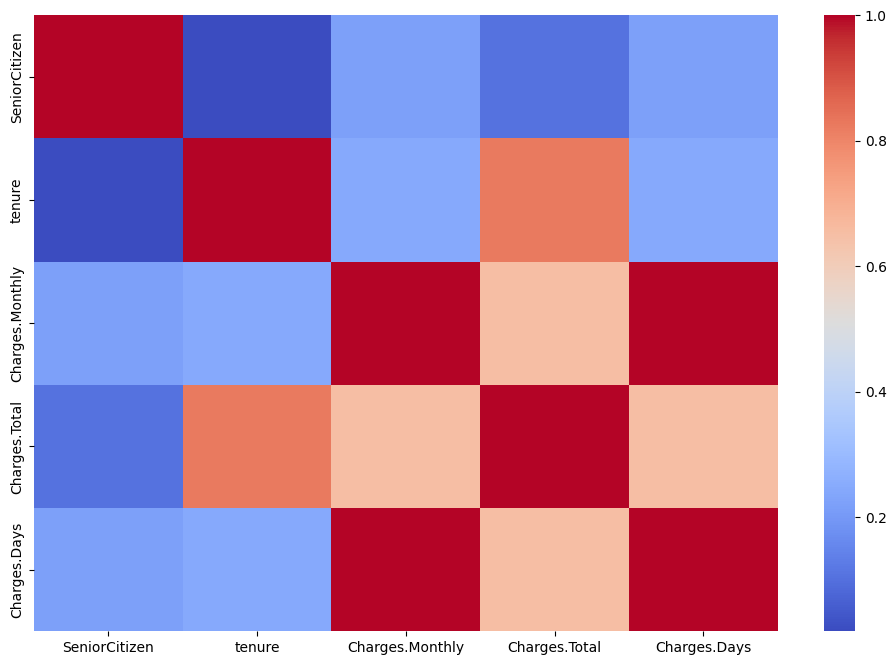

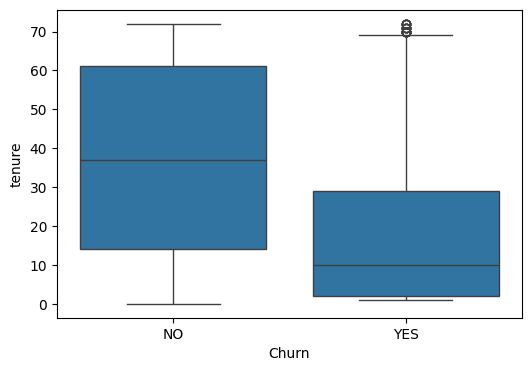

ValueError: Could not interpret value `TotalCharges` for `y`. An entry with this name does not appear in `data`.

<Figure size 600x400 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# matriz correlacion
corr = df_nuevo.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.show()

# contrato vs churn
plt.figure(figsize=(6,4))
sns.boxplot(data=df_nuevo, x="Churn", y="tenure")
plt.show()

# gasto total vs churn
plt.figure(figsize=(6,4))
sns.boxplot(data=df_nuevo, x="Churn", y="TotalCharges")
plt.show()


# 🤖 Modelado Predictivo

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_res_scaled, y_res, test_size=0.3, random_state=42
)


Descripción
Editar
Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

Un modelo puede requerir normalización, como Regresión Logística o KNN.

El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.

Comentarios y Actividad
Mostrar detalles
Escribe un comentario...




In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# modelo con datos normalizados
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train, y_train)

# modelo sin normalizar
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_res, y_res)


RandomForestClassifier(random_state=42)

Evalúa cada modelo utilizando las siguientes métricas:

Exactitud (Acurácia)

Precisión

Recall

F1-score

Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

¿Cuál modelo tuvo el mejor desempeño?

¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# logistic regression
y_pred_log = log_model.predict(X_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log, pos_label="YES"))
print("Recall:", recall_score(y_test, y_pred_log, pos_label="YES"))
print("F1:", f1_score(y_test, y_pred_log, pos_label="YES"))
print(confusion_matrix(y_test, y_pred_log))

# random forest
from sklearn.model_selection import train_test_split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

y_pred_rf = rf_model.predict(X_test_rf)
print("\nRandom Forest")
print("Accuracy:", accuracy_score(y_test_rf, y_pred_rf))
print("Precision:", precision_score(y_test_rf, y_pred_rf, pos_label="YES"))
print("Recall:", recall_score(y_test_rf, y_pred_rf, pos_label="YES"))
print("F1:", f1_score(y_test_rf, y_pred_rf, pos_label="YES"))
print(confusion_matrix(y_test_rf, y_pred_rf))



Logistic Regression
Accuracy: 0.7987033034887311
Precision: 0.7960644007155635
Recall: 0.8115501519756839
F1: 0.8037326911499096
[[1252  342]
 [ 310 1335]]

Random Forest
Accuracy: 0.9925903056498919
Precision: 0.9927051671732523
Recall: 0.9927051671732523
F1: 0.9927051671732523
[[1582   12]
 [  12 1633]]


Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

Regresión Logística: Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.

KNN (K-Nearest Neighbors): Observa cómo los vecinos más cercanos influyen en la decisión de clasificación. Las variables más impactantes pueden ser aquellas que más contribuyen a la proximidad entre los puntos de datos.

Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.

SVM (Support Vector Machine): En el SVM, las variables más relevantes son aquellas que influyen en la frontera de decisión entre las clases. Puedes analizar los coeficientes de los vectores de soporte para entender qué variables tienen mayor impacto.

Otros Modelos: Dependiendo del modelo elegido, considera el análisis de métricas específicas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en técnicas de boosting (como XGBoost).

In [13]:
import numpy as np

# importancia variables regresion logistica
coef = pd.Series(log_model.coef_[0], index=pd.get_dummies(df_nuevo.drop(columns=["Churn"]), drop_first=True).columns)
print("Coeficientes Logistic Regression:")
print(coef.sort_values(ascending=False).head(10))

# importancia variables random forest
imp_rf = pd.Series(rf_model.feature_importances_, index=pd.get_dummies(df_nuevo.drop(columns=["Churn"]), drop_first=True).columns)
print("\nImportancia Random Forest:")
print(imp_rf.sort_values(ascending=False).head(10))



Coeficientes Logistic Regression:
MultipleLines_NO PHONE SERVICE           1.815298
PhoneService_YES                         1.479948
Charges.Total                            0.977774
PaymentMethod_ELECTRONIC CHECK           0.880444
PaymentMethod_MAILED CHECK               0.520966
PaperlessBilling_YES                     0.456141
PaymentMethod_CREDIT CARD (AUTOMATIC)    0.451872
MultipleLines_YES                        0.325373
gender_MALE                              0.229414
Charges.Monthly                          0.219791
dtype: float64

Importancia Random Forest:
Charges.Total                     0.174560
tenure                            0.164064
Charges.Monthly                   0.156879
PaymentMethod_ELECTRONIC CHECK    0.112141
Charges.Days                      0.102069
Contract_TWO YEAR                 0.058519
PaperlessBilling_YES              0.054832
Contract_ONE YEAR                 0.026663
gender_MALE                       0.023946
MultipleLines_YES                 0.

# Conclusión


Elaboren un informe detallado, destacando los factores que más influyen en la cancelación, basándose en las variables seleccionadas y en el rendimiento de cada modelo.

Identifiquen los principales factores que afectan la cancelación de clientes y propongan estrategias de retención basadas en los resultados obtenidos.

En base a los modelos que probamos, vimos que hay varias variables que pegan fuerte en si el cliente se va o no. cosas como el tiempo que lleva en la empresa (tenure), el gasto total que hizo (TotalCharges), si tiene contrato largo o corto, y si usa ciertos servicios extra. en la regresion logistica, esas variables salen con coef grandes, lo que marca que tiran bastante para predecir churn. en el random forest, lo mismo: tenure, contrato y gastos aparecen arriba en la lista de importancia.

segun esto, para retener clientes conviene enfocarse en que los de contrato corto pasen a planes largos, ofrecer beneficios a los que gastan poco, y seguir de cerca a los que llevan poco tiempo para evitar que se vayan rapido.